In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
matplotlib.rc('font', size=16)

In [2]:
academic_df = pd.read_csv('user_rating_academic.csv')
nonacademic_df = pd.read_csv('user_rating_non_academic.csv')

del (
    academic_df[academic_df.columns[0]],
    academic_df['age'],
    academic_df['id_userdata'],
    academic_df['barangay'],
    academic_df['user_id'],
    academic_df['language'],
    academic_df['date_joined'],
    academic_df['Barangay'],
    academic_df['Municipality / City'],
    academic_df['field_test'],
    academic_df['id_rating'],
    academic_df['date']
)

del (
    nonacademic_df[nonacademic_df.columns[0]],
    nonacademic_df['age'],
    nonacademic_df['id_userdata'],
    nonacademic_df['barangay'],
    nonacademic_df['user_id'],
    nonacademic_df['language'],
    nonacademic_df['date_joined'],
    nonacademic_df['Barangay'],
    nonacademic_df['Municipality / City'],
    nonacademic_df['field_test'],
    nonacademic_df['id_rating'],
    nonacademic_df['date']
)

academic_df = academic_df[academic_df.gender.notnull() 
                          & academic_df.age_group.notnull()
                          & (academic_df.age_group != 0)
                          & (academic_df.qid != 5)
                          & (academic_df.qid != 8)]
nonacademic_df = nonacademic_df[nonacademic_df.gender.notnull() 
                                & nonacademic_df.age_group.notnull()
                                & (nonacademic_df.age_group != 0)
                                & (nonacademic_df.qid != 5)
                                & (nonacademic_df.qid != 8)]

In [3]:
academic_df.head()

,gender,age_group,qid,score
0,M,1,7.0,7.0
1,M,1,3.0,6.0
3,M,1,1.0,5.0
4,M,1,4.0,4.0
5,M,1,2.0,5.0


In [4]:
nonacademic_df.head()

,gender,age_group,qid,score
1,M,3,7.0,1.0
2,M,3,1.0,8.0
3,M,3,6.0,7.0
5,M,3,4.0,8.0
6,M,3,2.0,8.0


In [5]:
genders = ['M', 'F']
age_groups = [1, 2, 3, 4]

assert set(academic_df['gender'].unique().tolist()) == set(genders)
assert set(nonacademic_df['gender'].unique().tolist()) == set(genders)
assert set(nonacademic_df['age_group'].unique().tolist()).issubset(set(age_groups))
assert set(academic_df['age_group'].unique().tolist()).issubset(set(age_groups))

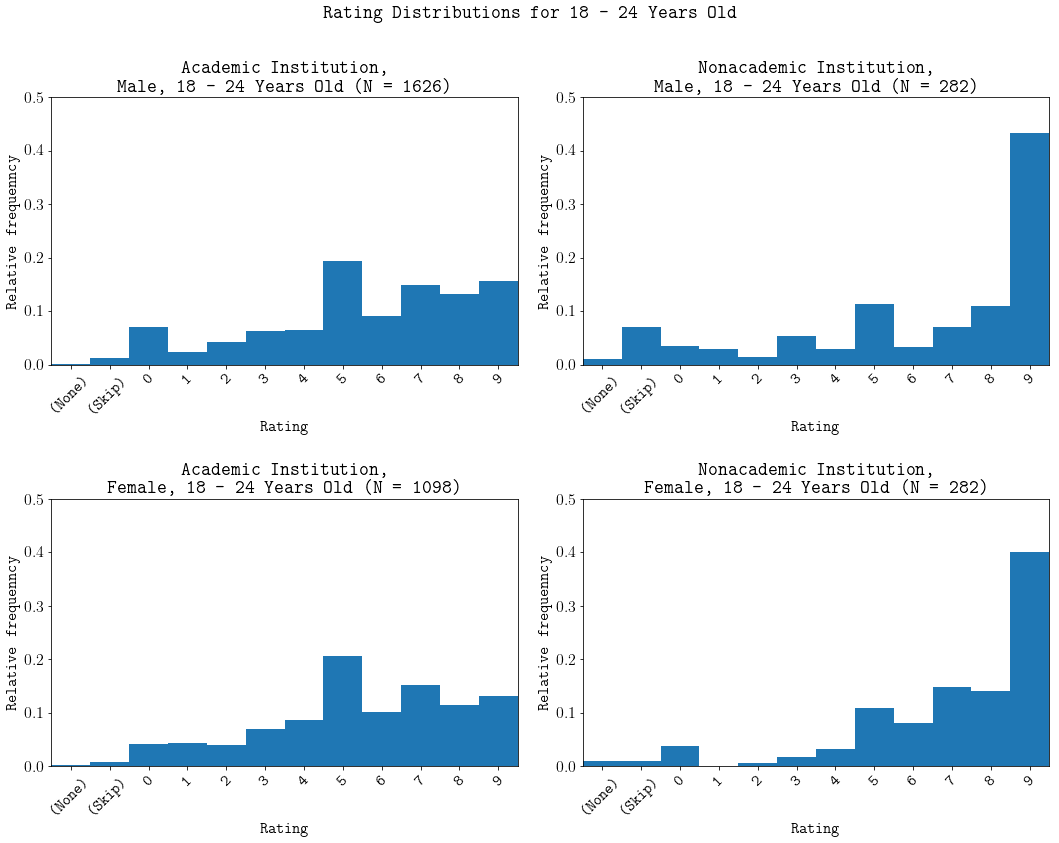

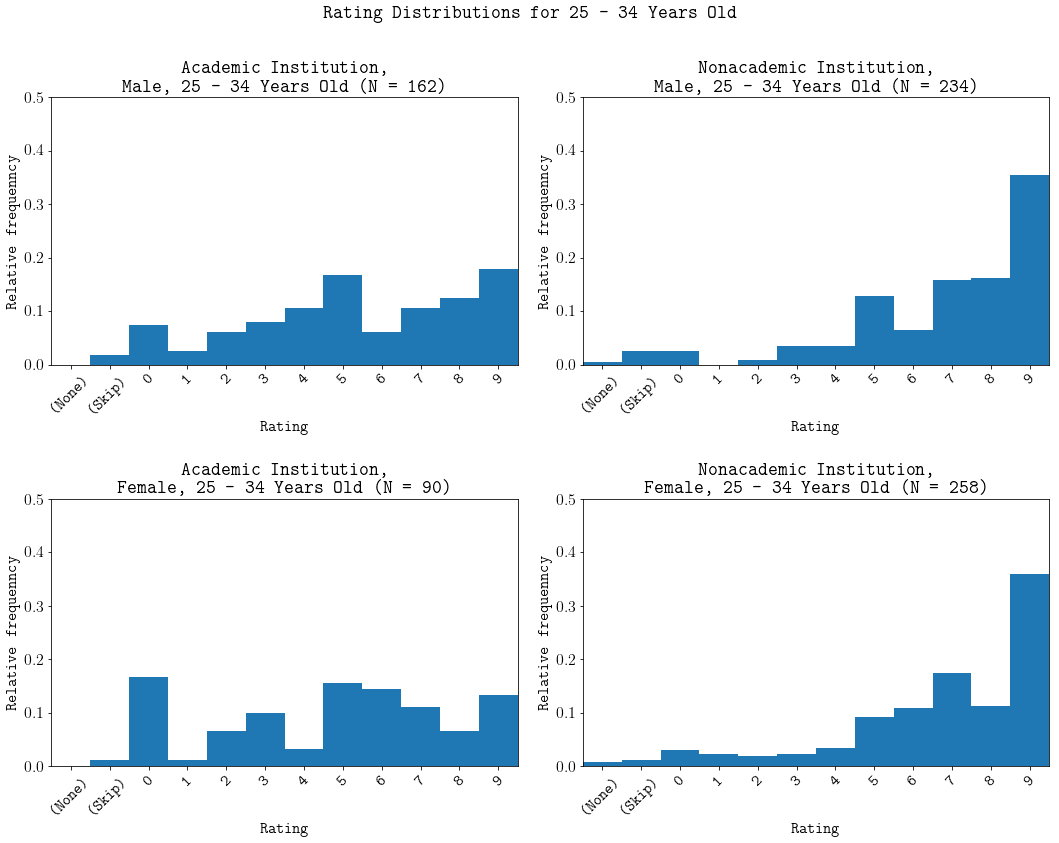

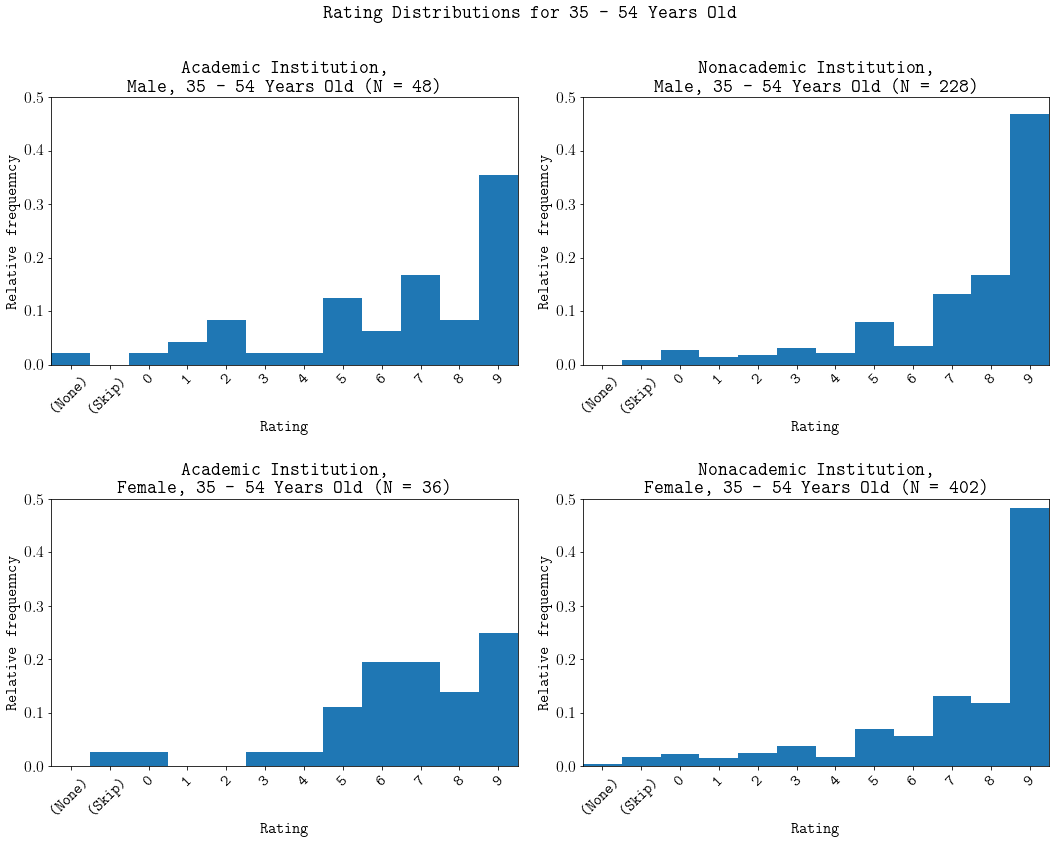

In [6]:
gender_descriptions = {
    'M': 'Male',
    'F': 'Female',
}
age_descriptions = {
    1: '18 - 24 Years Old',
    2: '25 - 34 Years Old',
    3: '35 - 54 Years Old',
}
if 4 in age_groups:
    age_groups.remove(4)  # Academic tests have no participants in age group 4

def plot_distribution(ax, gender, age_group, data, academic):
    ax.set_title('{academic}, \n{gender}, {age} (N = {N})'.format(
        gender=gender_descriptions[gender],
        age=age_descriptions[age_group],
        N=len(data),
        academic='Academic Institution' if academic else 'Nonacademic Institution'
    ))
    ax.hist(data, 12, [-2.5, 9.5], normed=True)
    ax.set_xticks(np.arange(-2, 10))
    ax.set_xticklabels(['(None)', '(Skip)'] + list(range(0, 10)), rotation=45)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Relative frequenncy')
    ax.set_xlim(-2.5, 9.5)
    ax.set_ylim(0, 0.5)

for age_group in age_groups:
    figure, axes = plt.subplots(len(genders), 2, figsize=(15, 6 * len(genders)))
    for row, gender in enumerate(genders):
        academic_df_subset = academic_df[(academic_df.gender == gender) 
                                         & (academic_df.age_group == age_group)]
        nonacademic_df_subset = nonacademic_df[(nonacademic_df.gender == gender) 
                                               & (nonacademic_df.age_group == age_group)]
        plot_distribution(axes[row, 0], gender, age_group, academic_df_subset.score.tolist(), True)
        plot_distribution(axes[row, 1], gender, age_group, nonacademic_df_subset.score.tolist(), False)
    figure.suptitle('Rating Distributions for {age}'.format(age=age_descriptions[age_group]))
    plt.tight_layout(h_pad=2.5)
    figure.subplots_adjust(top=0.875)